## Project Notebook 
### Group: Jack Boydell, 

Importing necessary packages. 

In [685]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error as MSE, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier

### Unemployment Rates Analysis

In [686]:
unemp_rates = pd.read_csv('/Users/jackboydell/Desktop/CS 475/Consumer Sentiment Project/unemployment_rates_final.csv')
back_up_df = unemp_rates.copy()
unemp_rates.head()

,date,year,month,go_up,stay_same,go_down,dk_na,relative,year.1,month.1,unemployment_rate,one_month_net_change,twelve_month_net_change,one_month_percent_change,twelve_month_percent_change
0,1978-01-31,1978,1,20,48,30,2,90,1979,1,5.9,-0.1,-0.5,-1.7,-7.8
1,1978-02-28,1978,2,30,41,24,5,106,1979,2,5.9,0.0,-0.4,0.0,-6.3
2,1978-03-31,1978,3,14,52,31,3,83,1979,3,5.8,-0.1,-0.5,-1.7,-7.9
3,1978-04-30,1978,4,17,56,25,2,92,1979,4,5.8,0.0,-0.3,0.0,-4.9
4,1978-05-31,1978,5,23,45,26,6,97,1979,5,5.6,-0.2,-0.4,-3.4,-6.7


In [687]:
unemp_rates.info()
unemp_rates['date'] = pd.to_datetime(unemp_rates['date']) # changing full date column to Datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 15 columns):
date                           518 non-null object
year                           518 non-null int64
month                          518 non-null int64
go_up                          518 non-null int64
stay_same                      518 non-null int64
go_down                        518 non-null int64
dk_na                          518 non-null int64
relative                       518 non-null int64
year.1                         518 non-null int64
month.1                        518 non-null int64
unemployment_rate              518 non-null float64
one_month_net_change           518 non-null float64
twelve_month_net_change        518 non-null float64
one_month_percent_change       518 non-null float64
twelve_month_percent_change    518 non-null float64
dtypes: float64(5), int64(9), object(1)
memory usage: 60.8+ KB


In [688]:
# calculating positive(0) or negative(1) one month net change and applying as a categorical variable 
# this can be repeated for other columns that we want to look at as a categoery
def pos_neg_category(df, old_col_name, new_col_name):
    '''
    df: (Pandas DataFrame)
    old_col_name: (name of numerical column to )
    new_col_name:
    '''
    lst = [] 
    for value in df[old_col_name]:
        if value < 0:
            lst.append(1)
        else:
            lst.append(0)
            
    df = pd.concat([df, pd.Series(lst, name=new_col_name)], axis=1)
    df[new_col_name] = df[new_col_name].astype('category')
    
    return df

In [689]:
unemp_rates = pos_neg_category(unemp_rates, 'one_month_net_change', 'OMNC_cat')
unemp_rates.head()

,date,year,month,go_up,stay_same,go_down,dk_na,relative,year.1,month.1,unemployment_rate,one_month_net_change,twelve_month_net_change,one_month_percent_change,twelve_month_percent_change,OMNC_cat
0,1978-01-31,1978,1,20,48,30,2,90,1979,1,5.9,-0.1,-0.5,-1.7,-7.8,1
1,1978-02-28,1978,2,30,41,24,5,106,1979,2,5.9,0.0,-0.4,0.0,-6.3,0
2,1978-03-31,1978,3,14,52,31,3,83,1979,3,5.8,-0.1,-0.5,-1.7,-7.9,1
3,1978-04-30,1978,4,17,56,25,2,92,1979,4,5.8,0.0,-0.3,0.0,-4.9,0
4,1978-05-31,1978,5,23,45,26,6,97,1979,5,5.6,-0.2,-0.4,-3.4,-6.7,1


In [690]:
# minimum and maximum unemployment rates
min_ = unemp_rates['unemployment_rate'].min()
max_ = unemp_rates['unemployment_rate'].max()
print(min_, max_)

3.5 14.7


In [691]:
ordered_dec = unemp_rates.sort_values('go_down', ascending=False)
viz_date = '2009-02-28'
viz_row = unemp_rates.loc[unemp_rates['date'] == '2009-02-28']

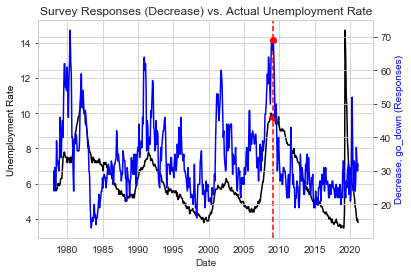

In [692]:
fig, ax1 = plt.subplots()
plt.title('Survey Responses (Decrease) vs. Actual Unemployment Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate', c = 'black')
ax1.plot('date', 'unemployment_rate', data = unemp_rates, c='black')
ax1.plot(viz_row['date'], viz_row['unemployment_rate'], marker = 'o', c='red')
ax1.axvline(x=viz_row['date'], c='red', ls='--')


ax2 = ax1.twinx()
ax2.set_ylabel('Decrease, go_down (Responses)', c='blue')
ax2.plot('date', 'go_down', data=unemp_rates, c='blue')
ax2.plot(viz_row['date'], viz_row['go_down'], marker = 'o', c='red')

plt.show()

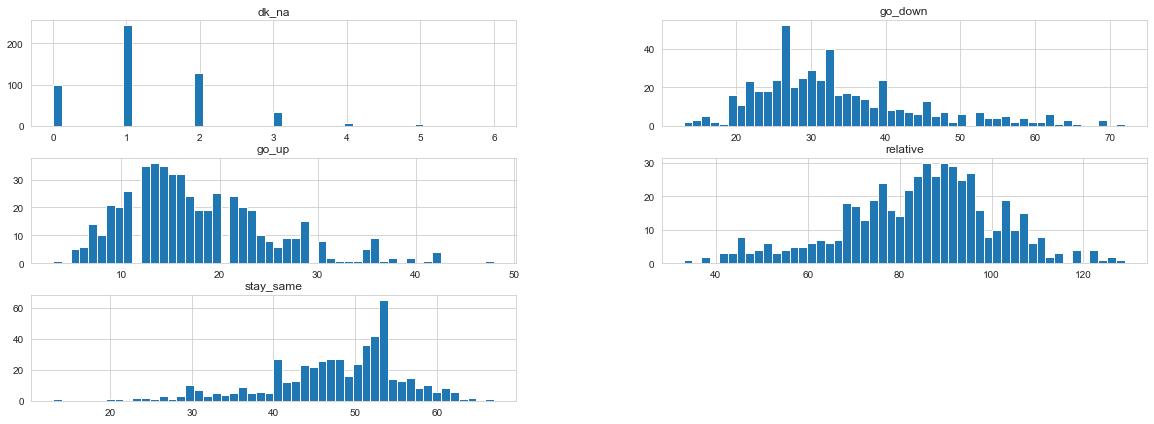

In [693]:
# distributions of survey columns
dist_columns = ['go_up', 'stay_same', 'go_down', 'dk_na', 'relative']
unemp_rates[dist_columns].hist(bins = 50, figsize=(20,7))
plt.show()

### One Month Net Change Category (OMNC cat) as target variable 
consider going through mutliclass classification: positive, 0, negative

In [694]:
# preparing X, y for model fitting
X = unemp_rates.loc[:, ['go_up', 'stay_same', 'go_down', 'dk_na', 'relative']]
print(f'Column Variances:\n{X.var()}') # looking at variances, do we need to impose a standard scale?

y = unemp_rates['OMNC_cat'].to_numpy()
X = X.to_numpy()

Column Variances:
go_up         58.028144
stay_same     68.434378
go_down      119.609777
dk_na          0.951584
relative     285.565521
dtype: float64


In [695]:
# creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 21)

In [696]:
# testing out basic LogisitcRegression as a classifier
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_pred, y_test)}')
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_proba)}') # think about plotting ROC-AUC scores for each C, or other hyperparameter

Accuracy score: 0.6153846153846154
ROC-AUC score: 0.5327868852459017


In [697]:
# GridSearchCV for basic LogisitcRegression 
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2']}

grid_search = GridSearchCV(logreg, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'C': 0.001, 'penalty': 'l1'}


0.5893719806763285

In [698]:
# Linear SVM Classifier
scaler = StandardScaler()
lin_svm_clf = SVC(kernel='linear', C=100)

scaled_svc = Pipeline([('scaler', scaler), ('linear_svc', lin_svm_clf)])
scaled_svc.fit(X_train, y_train)
y_pred = scaled_svc.predict(X_test)
accuracy_score(y_pred, y_test)

0.5865384615384616

In [699]:
# Decision Trees Classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=21)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.5673076923076923

In [700]:
cross_val_score(dt_clf, X_train, y_train, cv=5)

array([0.55421687, 0.57831325, 0.57831325, 0.53012048, 0.54878049])

In [701]:
# Bagging Classifier with base model of dt_clf
dt_bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators = 10, n_jobs=-1, oob_score = True, random_state=21)
dt_bag_clf.fit(X_train, y_train)
y_pred = dt_bag_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
dt_bag_clf.oob_score_

0.5480769230769231


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.5434782608695652

In [702]:
# Gradient Boosting Classifier with 
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
gb_clf.score(X_test, y_test)

0.5096153846153846

### 12 Month Net Change (year_NC)

In [703]:
unemp_rates = pos_neg_category(unemp_rates, 'twelve_month_net_change', 'year_NC')
unemp_rates.head() 

,date,year,month,go_up,stay_same,go_down,dk_na,relative,year.1,month.1,unemployment_rate,one_month_net_change,twelve_month_net_change,one_month_percent_change,twelve_month_percent_change,OMNC_cat,year_NC
0,1978-01-31,1978,1,20,48,30,2,90,1979,1,5.9,-0.1,-0.5,-1.7,-7.8,1,1
1,1978-02-28,1978,2,30,41,24,5,106,1979,2,5.9,0.0,-0.4,0.0,-6.3,0,1
2,1978-03-31,1978,3,14,52,31,3,83,1979,3,5.8,-0.1,-0.5,-1.7,-7.9,1,1
3,1978-04-30,1978,4,17,56,25,2,92,1979,4,5.8,0.0,-0.3,0.0,-4.9,0,1
4,1978-05-31,1978,5,23,45,26,6,97,1979,5,5.6,-0.2,-0.4,-3.4,-6.7,1,1


In [704]:
# preparing X, y for model fitting
X = unemp_rates.loc[:, ['go_up', 'stay_same', 'go_down', 'dk_na', 'relative']]
print(f'Column Variances:\n{X.var()}') # looking at variances, do we need to impose a standard scale?

y = unemp_rates['OMNC_cat'].to_numpy()
X = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 17)

Column Variances:
go_up         58.028144
stay_same     68.434378
go_down      119.609777
dk_na          0.951584
relative     285.565521
dtype: float64


In [705]:
# testing out basic LogisitcRegression as a classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
acc_score = logreg.score(X_test, y_test)
print(f'Accuracy score: {acc_score}')
y_pred_proba = logreg.predict_proba(X_test)[:,1]

print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_proba)}') # think about plotting ROC-AUC scores for each C, or other hyperparameter

cm = confusion_matrix(y_test, logreg_pred)
cm

Accuracy score: 0.6057692307692307
ROC-AUC score: 0.6014105985512771


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[57,  4],
       [37,  6]])

              precision    recall  f1-score   support

           0       0.61      0.93      0.74        61
           1       0.60      0.14      0.23        43

    accuracy                           0.61       104
   macro avg       0.60      0.54      0.48       104
weighted avg       0.60      0.61      0.53       104



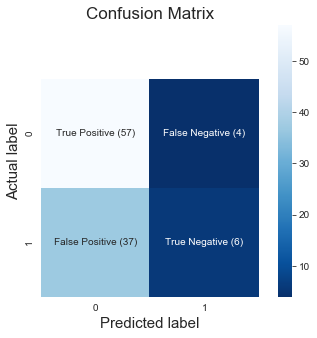

In [706]:
# visualizing LogisiticRegression confusion matrix heatmap
class_report = classification_report(y_test, logreg_pred)
print(class_report)

plt.figure(figsize=(7,5))
annotations = np.array([['True Positive (57)', 'False Negative (4)'], ['False Positive (37)', 'True Negative (6)']])
annotations = annotations.reshape(2,2)
sns.heatmap(cm, cmap = 'Blues_r', square=True, annot=annotations, fmt='')
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.ylim([2, -0.5])
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

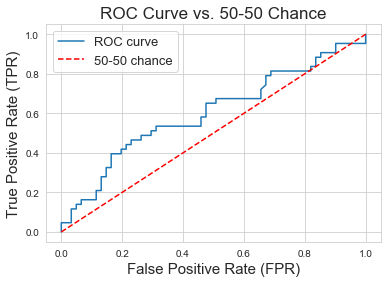

In [707]:
# ROC Curve vs. 50-50 chance line
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1], [0,1], ls = '--', c='r', label='50-50 chance')
plt.title('ROC Curve vs. 50-50 Chance', fontsize=17)
plt.xlabel('False Positive Rate (FPR)', fontsize=15)
plt.ylabel('True Positive Rate (TPR)', fontsize=15)
plt.legend(loc='upper left', fontsize=13)
plt.show()

In [708]:
# GridSearchCV for basic LogisitcRegression 
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2']}

grid_search = GridSearchCV(logreg, param_grid=params, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations

{'C': 0.001, 'penalty': 'l1'}
0.5893719806763285


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [709]:
# logistic regression with cross validation, hyperparameters: c=0.001, penalty=l1
final_logreg = LogisticRegression()
cv_scores = cross_val_score(final_logreg, X_train, y_train, cv=10)
print(f'CV Scores Mean: {np.mean(cv_scores)}')
print(f'CV Scores 95% CI: {np.quantile(cv_scores, [0.025, 0.975])}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV Scores Mean: 0.5892566782810685
CV Scores 95% CI: [0.52016551 0.65595238]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [710]:
# Decision Tree, visualize using with export_graphviz
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=21)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.5865384615384616

In [711]:
# Bagging Classifier with base model of dt_clf
dt_bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators = 10, n_jobs=-1, oob_score = True, random_state=21)
dt_bag_clf.fit(X_train, y_train)
print(dt_bag_clf.score(X_test, y_test))
dt_bag_clf.oob_score_

0.5480769230769231


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.5700483091787439

In [712]:
# Linear SVM
scaler = StandardScaler()
lin_svm_clf = SVC(kernel='linear', C=100)

scaled_svc = Pipeline([('scaler', scaler), ('linear_svc', lin_svm_clf)])
scaled_svc.fit(X_train, y_train)
y_pred = scaled_svc.predict(X_test)
accuracy_score(y_pred, y_test)

0.5865384615384616

### Interest Rates Analysis

In [713]:
interest_rates = pd.read_csv('/Users/jackboydell/Desktop/CS 475/Consumer Sentiment Project/interest_rates_final.csv')
back_up_df2 = interest_rates.copy()
interest_rates.head(15)

,date,year,month,go_up,stay_same,go_down,dk_na,relative,year.1,fed_funds_rate
0,1978-01-31,1978,1,54,31,9,6,55,1979,9.50
1,1978-02-28,1978,2,48,32,6,14,58,1979,9.50
2,1978-03-31,1978,3,55,34,4,7,49,1979,9.50
3,1978-04-30,1978,4,61,29,4,6,43,1979,9.50
4,1978-05-31,1978,5,57,29,7,7,50,1979,9.50
5,1978-06-30,1978,6,64,28,5,3,41,1979,9.50
6,1978-07-31,1978,7,66,23,6,5,40,1979,9.69
7,1978-08-31,1978,8,59,26,9,6,50,1979,10.24
8,1978-09-30,1978,9,67,23,5,5,38,1979,10.70
9,1978-10-31,1978,10,63,26,6,5,43,1979,11.77


In [714]:
interest_rates.info()
interest_rates['date'] = pd.to_datetime(interest_rates['date']) # changing full date column to Datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 10 columns):
date              512 non-null object
year              512 non-null int64
month             512 non-null int64
go_up             512 non-null int64
stay_same         512 non-null int64
go_down           512 non-null int64
dk_na             512 non-null int64
relative          512 non-null int64
year.1            512 non-null int64
fed_funds_rate    512 non-null float64
dtypes: float64(1), int64(8), object(1)
memory usage: 40.1+ KB


In [715]:
min_i, max_i = interest_rates['fed_funds_rate'].min(), interest_rates['fed_funds_rate'].max()
min_i, max_i

(0.25, 14.0)

In [716]:
# EDA - unemployment rate (SURVEY)
subset2 = interest_rates[interest_rates['date'] >='1999-01-01']
subset2 = subset2[subset2['date'] <= '2000-01-01'].sort_values('fed_funds_rate', ascending=False)
viz2_date = '1999-12-31'
viz2_row = interest_rates.loc[interest_rates['date'] == viz2_date]

subset3 = interest_rates[interest_rates['date'] >='2005-01-01']
subset3 = subset[subset['date'] <= '2008-01-01'].sort_values('fed_funds_rate', ascending=False)
viz3_date = '2006-02-28'
viz3_row = interest_rates.loc[interest_rates['date'] == viz3_date]

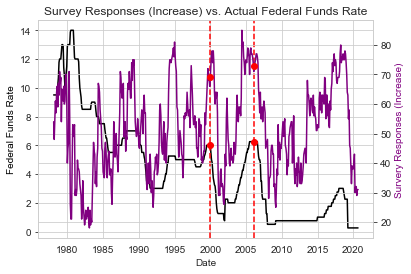

In [717]:
fig, ax1 = plt.subplots()
plt.title('Survey Responses (Increase) vs. Actual Federal Funds Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Federal Funds Rate', c = 'black')
ax1.plot('date', 'fed_funds_rate', data = interest_rates, c='black')

ax1.plot(viz2_row['date'], viz2_row['fed_funds_rate'], marker = 'o', c='red')
ax1.axvline(x=viz2_row['date'], c='red', ls='--')

ax1.plot(viz3_row['date'], viz3_row['fed_funds_rate'], marker = 'o', c='red')
ax1.axvline(x=viz3_row['date'], c='red', ls='--')

ax2 = ax1.twinx()
ax2.set_ylabel('Survery Responses (Increase)', c='purple')
ax2.plot('date', 'go_up', data=interest_rates, c='purple')
ax2.plot(viz2_row['date'], viz2_row['go_up'], marker = 'o', c='red')
ax2.plot(viz3_row['date'], viz3_row['go_up'], marker = 'o', c='red')

plt.show()

In [718]:
# calculating negative(-1), neutral(0) or positive(1) one month net change and applying as a categorical variable 
# this can be repeated for other columns that we want to look at as a categoery
def pos_neut_neg_category(df, old_col_name, new_col_name):
    '''
    df: (Pandas DataFrame)
    old_col_name: (name of numerical column to )
    new_col_name:
    '''
    lst = [] 
    for value in df[old_col_name]:
        if value < 0:
            lst.append(-1)
            
        elif value == 0:
            lst.append(0)
            
        else:
            lst.append(1)
            
    df = pd.concat([df, pd.Series(lst, name=new_col_name)], axis=1)
    df[new_col_name] = df[new_col_name].astype('category')
    
    return df

In [719]:
# turning federal funds rate into one month change category
new_col_list = []
previous = 9.5
for value in pd.Series(interest_rates['fed_funds_rate']):
    new_col_list.append(previous - value)
    previous = value
    
one_month_net_change = pd.Series(new_col_list, name='one_month_net_change')
interest_rates = pd.concat([interest_rates, one_month_net_change], axis=1)
print(interest_rates.info())

interest_rates = pos_neut_neg_category(interest_rates, 'one_month_net_change', 'OMNC_cat')
interest_rates.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
date                    512 non-null datetime64[ns]
year                    512 non-null int64
month                   512 non-null int64
go_up                   512 non-null int64
stay_same               512 non-null int64
go_down                 512 non-null int64
dk_na                   512 non-null int64
relative                512 non-null int64
year.1                  512 non-null int64
fed_funds_rate          512 non-null float64
one_month_net_change    512 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 44.1 KB
None


,date,year,month,go_up,stay_same,go_down,dk_na,relative,year.1,fed_funds_rate,one_month_net_change,OMNC_cat
0,1978-01-31,1978,1,54,31,9,6,55,1979,9.50,0.00,0
1,1978-02-28,1978,2,48,32,6,14,58,1979,9.50,0.00,0
2,1978-03-31,1978,3,55,34,4,7,49,1979,9.50,0.00,0
3,1978-04-30,1978,4,61,29,4,6,43,1979,9.50,0.00,0
4,1978-05-31,1978,5,57,29,7,7,50,1979,9.50,0.00,0
5,1978-06-30,1978,6,64,28,5,3,41,1979,9.50,0.00,0
6,1978-07-31,1978,7,66,23,6,5,40,1979,9.69,-0.19,-1
7,1978-08-31,1978,8,59,26,9,6,50,1979,10.24,-0.55,-1
8,1978-09-30,1978,9,67,23,5,5,38,1979,10.70,-0.46,-1
9,1978-10-31,1978,10,63,26,6,5,43,1979,11.77,-1.07,-1


In [720]:
interest_rates.iloc[12:17]

,date,year,month,go_up,stay_same,go_down,dk_na,relative,year.1,fed_funds_rate,one_month_net_change,OMNC_cat
12,1979-01-31,1979,1,69,20,7,4,38,1980,12.00,0.00,0
13,1979-02-28,1979,2,54,27,13,6,59,1980,12.52,-0.52,-1
14,1979-03-31,1979,3,65,23,7,5,42,1980,13.00,-0.48,-1
15,1979-04-30,1979,4,64,24,8,4,44,1980,13.00,0.00,0
16,1979-05-31,1979,5,61,27,7,5,46,1980,12.94,0.06,1


In [722]:
# another example of EDA
#sns.scatterplot(x='go_up', y='go_down', z='stay_same', data=interest_rates, hue='OMNC_cat', legend='full')
#plt.show()

In [723]:
X = interest_rates.loc[:, ['go_up', 'stay_same', 'go_down', 'dk_na', 'relative']]
print(f'Column Variances:\n{X.var()}') # looking at variances, do we need to impose a standard scale?

y = interest_rates['OMNC_cat'].to_numpy()
X = X.to_numpy() 

Column Variances:
go_up        229.262380
stay_same     77.100779
go_down      119.998223
dk_na          1.955353
relative     619.770758
dtype: float64


In [724]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y, random_state = 20)

In [725]:
# linear SVM
scaler = StandardScaler()
lin_svm_clf = SVC(kernel='linear', C=100, class_weight = 'balanced')

scaled_svc = Pipeline([('scaler', scaler), ('linear_svc', lin_svm_clf)])
scaled_svc.fit(X_train, y_train)
training_SVM_pred = scaled_svc.predict(X_train)
SVM_y_pred = scaled_svc.predict(X_test)
training_score = scaled_svc.score(X_train, y_train)
print(f'Training Score: {training_score}')
SVM_score = lin_svm_clf.score(X_test, y_test)
SVM_score

Training Score: 0.4889975550122249


0.5533980582524272

In [726]:
# LogisiticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
logreg.fit(X_train, y_train)
log_y_pred = logreg.predict(X_test)
log_acc_score = logreg.score(X_test, y_test)
print(f'Accuracy score: {log_acc_score}')
y_pred_proba = logreg.predict_proba(X_test)[:,1]

Accuracy score: 0.4854368932038835


In [727]:
# Decision Trees Classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=21, class_weight='balanced')
dt_clf.fit(X_train, y_train)
print(dt_clf.score(X_test, y_test))
dt_y_pred = dt_clf.predict(X_test)

0.36893203883495146


In [728]:
# Voting Classifier with below models... is this good in multiclass setting? probably not
estimators=[('LogisitcRegression', logreg), ('Scaled_SVM', scaled_svc), ('DecisionTree', dt_clf)]
lin_vc = VotingClassifier(estimators=estimators)
lin_vc.fit(X_train, y_train)
lin_vc.score(X_test,y_test)

0.47572815533980584

In [729]:
#BaggingClassifier for linear SVM... NOPE!
bag = BaggingClassifier(scaled_svc, n_estimators=5, n_jobs=-1)
bag.fit(X_train, y_train)
bag.score(X_test, y_test)

0.47572815533980584

[[ 5  5  3]
 [26 41  9]
 [ 9  2  3]]
              precision    recall  f1-score   support

          -1       0.12      0.38      0.19        13
           0       0.85      0.54      0.66        76
           1       0.20      0.21      0.21        14

    accuracy                           0.48       103
   macro avg       0.39      0.38      0.35       103
weighted avg       0.67      0.48      0.54       103



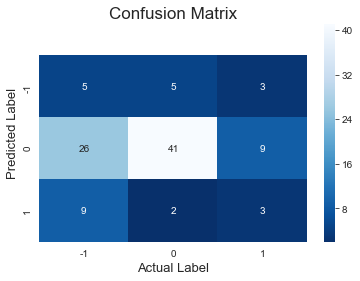

In [730]:
# visualizing Linear SVM confusion matrix heatmap
cm_2 = confusion_matrix(y_test, SVM_y_pred)
class_report2 = classification_report(y_test, SVM_y_pred)
print(cm_2)
print(class_report2)
cm_2_df = pd.DataFrame(cm_2, index = [-1,0,1], columns =[-1,0,1])

sns.heatmap(cm_2_df, annot=True, cmap='Blues_r')
plt.ylim([3,-0.5])
plt.xlabel('Actual Label', fontsize=13)
plt.ylabel('Predicted Label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

### Anamoly Detection

In [731]:
# anamoly detection using OneClassSVM - interest rates 
cols = ['go_up', 'stay_same', 'go_down', 'dk_na', 'relative']
an_detec = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03, random_state=21) # percentage to consider outliers
an_detec.fit(interest_rates[cols])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.03, random_state=21, shrinking=True, tol=0.001,
            verbose=False)

In [732]:
y_pred = an_detec.predict(interest_rates[cols])
print(interest_rates['fed_funds_rate'].mean())

# filter outlier index
outlier_index = np.where(y_pred == -1) 
# filter outlier values
outlier_rows = interest_rates.iloc[outlier_index]
print(len(outlier_rows))
outlier_rows.head(25)

4.459687499999999
16


,date,year,month,go_up,stay_same,go_down,dk_na,relative,year.1,fed_funds_rate,one_month_net_change,OMNC_cat
23,1979-12-31,1979,12,40,22,34,4,94,1980,12.87,-1.40,-1
27,1980-04-30,1980,4,56,18,24,2,68,1981,13.00,0.00,0
28,1980-05-31,1980,5,26,20,52,2,126,1981,13.87,-0.87,-1
29,1980-06-30,1980,6,21,22,54,3,133,1981,14.00,-0.13,-1
35,1980-12-31,1980,12,53,14,29,4,76,1981,12.10,0.93,1
47,1981-12-31,1981,12,21,25,50,4,129,1982,8.73,0.62,1
60,1983-01-31,1983,1,18,35,44,3,126,1984,8.50,0.00,0
63,1983-04-30,1983,4,21,42,34,3,113,1984,8.87,-0.37,-1
64,1983-05-31,1983,5,20,47,31,2,111,1984,9.00,-0.13,-1
203,1994-12-31,1994,12,81,12,6,1,25,1995,5.25,0.00,0


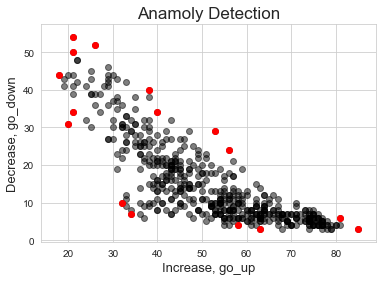

In [733]:
# visulalizing outliers: 1) 2D plot of survery counts, 2) distribution of outliers subset 
#plt.set_style.context(style = 'seaborn-darkgrid') # figure this out
#sns.set_theme('darkgrid')
plt.scatter(x = 'go_up', y ='go_down', data = interest_rates, c='black', alpha=0.5)
plt.scatter(x = 'go_up', y = 'go_down', data = outlier_rows, c='red')
plt.title('Anamoly Detection', fontsize=17)
plt.xlabel('Increase, go_up', fontsize=13)
plt.ylabel('Decrease, go_down', fontsize=13)

plt.show()

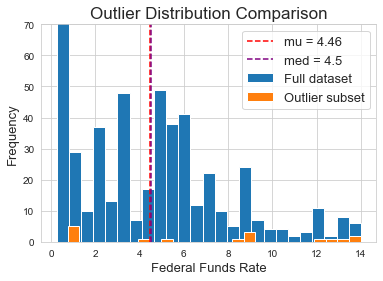

In [734]:
# 2) distribution of outliers
mu = interest_rates['fed_funds_rate'].mean()
med = interest_rates['fed_funds_rate'].quantile(0.5)

plt.hist('fed_funds_rate', data=interest_rates, bins=25, label='Full dataset')
plt.hist('fed_funds_rate', data=outlier_rows, bins=25, label='Outlier subset')
plt.axvline(x=mu, ls='--', c='r', label=f'mu = {np.round(mu,2)}')
plt.axvline(x=med, ls='--', c='purple', label = f'med = {np.round(med,2)}')

plt.ylim(0,70)

plt.legend(fontsize=13, loc='best')
plt.title('Outlier Distribution Comparison', fontsize=17)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Federal Funds Rate', fontsize=13)
plt.show()
